# Marketing Analysis

You managed to show excellent performance during the Practicum course, and you were also offered the opportunity to undergo an internship program in Y.Afisha's corporate analytics department. The first task they give you is to help optimize your marketing budget.

<b>Questions:</b>

   1. How do users use Y.Afisha products?
   2. When did they start making purchases?
   3. How much money does each user contribute?
   4. When will all the marketing costs be paid off?
   
<b>Objective:</b>
   1. To help optimize marketing budget.

<b>Stages:</b><a id='back'></a>

1. [Data Overview](#Start)
2. [Data Pre-processing](#Pre-processing)
3. [*Exploratory Data Analysis*](#EDA)
    - [Number of people using the product every day, week, and month](#1)
    - [Number of sessions per day](#2)
    - [Duration for each session](#3)
    - [How often do users return to using the product](#4)
    - [When did the user start making purchases](#5)
    - [Number of orders made during a certain period of time](#6)
    - [Average purchase size](#7)
    - [Amount of money contributed (LTV)](#8)
    - [Amount of money spent](#9)
    - [Customer acquisition cost from each source (CAC)](#10)
    - [How profitable the investment is (ROMI)](#11)
5. [General Conclusion](#Conclusion)

## Data Overview <a id="Start"></a>

In [1]:
# Load all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

**First dataset**

In [2]:
# Load datasets
data_1 = 'Y:\\Online Course\\Practicum\\Jupyter Notebook\\7 Project\\visits_log_us.csv'
visits_log = pd.read_csv(
    data_1,
    dtype = {
        'Device' : 'category',
        'Source Id' : 'category'
    },
    parse_dates = ['End Ts', 'Start Ts']
)

In [3]:
# General information
visits_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  category      
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(2), datetime64[ns](2), uint64(1)
memory usage: 8.9 MB


In [4]:
# Dataset size
visits_log.shape

(359400, 5)

In [5]:
# Sample data
visits_log.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


Documentation of the `visits` table (logs/server records that contain data on website visits):
- `Uid` - User ID
- `Device`  - the user's device
- `Start Ts`  - session start date and time
- `End Ts`  - session end date and time
- `Source Id`  - The advertising source ID, the source by which the user came to the website

All dates in this table use the YYYY-MM-DD format.

In [6]:
# Checking for missing values
visits_log.isnull().sum()

Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

In [7]:
# Checking for duplication
visits_log.duplicated().sum()

0

For this dataset, the naming that uses capital letters and the use of spaces needs to be improved.

**Second dataset**

In [8]:
# Load datasets
data_2 = 'Y:\\Online Course\\Practicum\\Jupyter Notebook\\7 Project\\orders_log_us.csv'
orders_log = pd.read_csv(
    data_2,
    parse_dates=['Buy Ts']
)

In [9]:
# General information
orders_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [10]:
# Dataset size
orders_log.shape

(50415, 3)

In [11]:
# Sample data
orders_log.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


`orders` table documentation (data related to orders):

- `Uid`  - ID of the user who made the order
- `Buy Ts`  - the date and time the order was made
- `Revenue` - Y.Afisha's income from the order

In [12]:
# Checking for missing values
orders_log.isnull().sum()

Buy Ts     0
Revenue    0
Uid        0
dtype: int64

In [13]:
# Checking for duplication
orders_log.duplicated().sum()

0

Just like in the first dataset which used capital letters and spaces, the column names can be improved.

**Third dataset**

In [14]:
# Load datasets
data_3 = 'Y:\\Online Course\\Practicum\\Jupyter Notebook\\7 Project\\costs_us.csv'
costs = pd.read_csv(
    data_3,
    dtype = {'source_id': 'category'},
    parse_dates = ['dt']
)

In [15]:
# General information
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   category      
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(1)
memory usage: 42.7 KB


In [16]:
# Dataset size
costs.shape

(2542, 3)

In [17]:
# Sample data
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


`costs` table documentation (data related to marketing expenses):

- `source_id` - Ad source ID
- `dt` - date
- `costs` - expenses for advertising sources on that date

In [18]:
# Checking for missing values
costs.isnull().sum()

source_id    0
dt           0
costs        0
dtype: int64

In [19]:
# Checking for duplication
costs.duplicated().sum()

0

Everything looks good.

**Tentative conclusion**

1. visits_log and orders_log, there are column names that can be corrected such as the use of capital letters at the beginning of words and also the use of spaces as word separators

2. costs, for this dataset everything looks good so that it can be analyzed further.

[Back to stages](#back)

## Data Pre-processing <a id="Pre-processing"></a>

**visits_log**

In [20]:
# Check column names
visits_log.columns

Index(['Device', 'End Ts', 'Source Id', 'Start Ts', 'Uid'], dtype='object')

In [21]:
# Rename column
visits_log = visits_log.rename(columns={
    'End Ts' : 'end_ts',
    'Source Id' : 'source_id',
    'Start Ts' : 'start_ts'
})

# Change the letters to lowercase
visits_log.columns = visits_log.columns.str.lower()

In [22]:
# Checking the result
visits_log.columns

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')

In [23]:
# Dataset size
visits_log.shape

(359400, 5)

In [24]:
# Filter data
visits_log = visits_log.loc[~(visits_log['start_ts'] > visits_log['end_ts'])]

In [25]:
# Checking the result
visits_log.shape

(359398, 5)

This dataset has been successfully repaired.

**orders_log**

In [26]:
# Check column names
orders_log.columns

Index(['Buy Ts', 'Revenue', 'Uid'], dtype='object')

In [27]:
# Rename the column
orders_log = orders_log.rename(columns={
    'Buy Ts' : 'buy_ts',
    'Revenue' : 'revenue',
    'Uid' : 'uid'
})

In [28]:
# Checking the result
orders_log.columns

Index(['buy_ts', 'revenue', 'uid'], dtype='object')

This dataset has been successfully repaired.

**Tentative conclusion**

Datasets that need to be fixed, such as the visits_log and orders_log datasets that use capital letters and spaces in column names have been successfully fixed.

[Back to stages](#back)

## *Exploratory Data Analysis* <a id="EDA"></a>

The next process that will be discussed is EDA (*Exploratory Data Analysis*) which discusses several questions to assist the data analysis process and draw conclusions from the analysis results.

### Number of people using the product every day, week, and month <a id="1"></a>

In [29]:
# visits_log dataset
visits_log.head()

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [30]:
# Get year, month, week, day, and date data
visits_log['year']  = visits_log['start_ts'].astype('datetime64[Y]')
visits_log['month'] = visits_log['start_ts'].astype('datetime64[M]')
visits_log['week']  = visits_log['start_ts'].astype('datetime64[W]')
visits_log['date'] = visits_log['start_ts'].dt.date

*Vanity metric* is a parameter that can make a marketing strategy look satisfactory. This metric plays an important role in building team motivation. In this case the parameters are DAU (*Daily Active Users*), WAU (*Weekly Active Users*), and MAU (*Monthly Active Users*).

In [31]:
# Calculates DAU, WAU, and MAU
dau_total = visits_log.groupby('date').agg({'uid' : 'nunique'}).mean()
wau_total = visits_log.groupby(['year', 'week']).agg({'uid' : 'nunique'}).mean()
mau_total = visits_log.groupby(['year', 'month']).agg({'uid' : 'nunique'}).mean()

In [32]:
# Displays the result
print('Number of product users per day:', dau_total[0])
print('Number of product users per week:', wau_total[0])
print('Number of product users per month:', mau_total[0])

Number of product users per day: 907.9917582417582
Number of product users per week: 5621.7037037037035
Number of product users per month: 23228.416666666668


As can be seen there are about 908 users per day using the product, around 5716 users per week, and 23228 users per month.

[Back to stages](#back)

### Number of sessions per day <a id="2"></a>

In [33]:
# Agg by year, and day
visits_per_user = visits_log.groupby(['date']).agg({
    'uid': ['count', 'nunique']
})

# Rename the column
visits_per_user.columns = ['n_sessions', 'n_users']

# Number of user sessions
visits_per_user['sessions_per_user'] = (visits_per_user['n_sessions'] / visits_per_user['n_users'])

In [34]:
# Checking the result
visits_per_user

,n_sessions,n_users,sessions_per_user
date,,,
2017-06-01,664,605,1.097521
2017-06-02,658,608,1.082237
2017-06-03,477,445,1.071910
2017-06-04,510,476,1.071429
2017-06-05,893,820,1.089024
...,...,...,...
2018-05-27,672,620,1.083871
2018-05-28,1156,1039,1.112608
2018-05-29,1035,948,1.091772


In [35]:
# View column descriptions
visits_per_user['sessions_per_user'].describe()

count    364.000000
mean       1.082166
std        0.020873
min        1.000000
25%        1.070321
50%        1.082488
75%        1.093876
max        1.217837
Name: sessions_per_user, dtype: float64

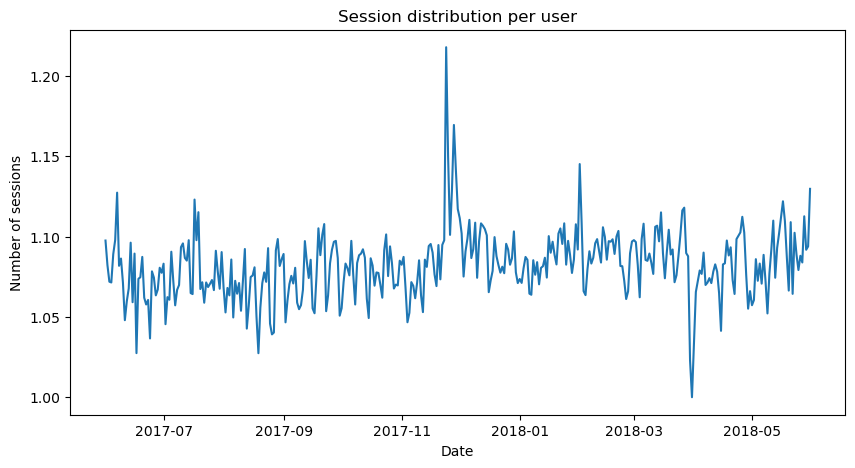

In [36]:
# Check the distribution
visits_per_user['sessions_per_user'].plot(kind='line', figsize=(10,5))

# Title
plt.title("Session distribution per user")

# Naming x,y-axis
plt.xlabel('Date')
plt.ylabel('Number of sessions')

# Displays the result
plt.show()

On average each user spends at least 1 session per day to use the product.

[Back to stages](#back)

### Duration for each session <a id="3"></a>

ASL(*Average Session Length*) is the amount of time users spend using the product in an average session.

In [37]:
# Calculates the duration of each session
visits_log['visit_duration_sec'] = (visits_log['end_ts'] - visits_log['start_ts']).dt.seconds

In [38]:
# View column descriptions
visits_log['visit_duration_sec'].describe()

count    359398.000000
mean        643.042287
std         997.105212
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       42660.000000
Name: visit_duration_sec, dtype: float64

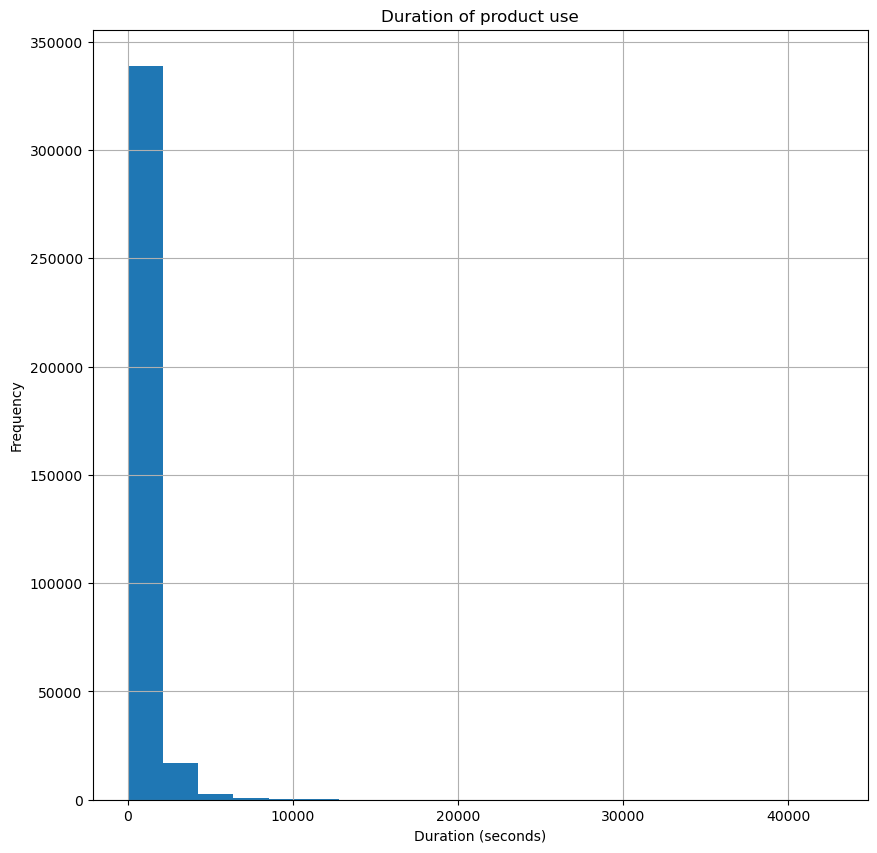

In [39]:
# Check the distribution
visits_log['visit_duration_sec'].hist(bins=20, figsize = (10,10))

# Histogram title
plt.title("Duration of product use")

# Naming x,y-axis
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')

# Displays the result
plt.show()

If the distribution is normal or close to normal, then we can use the value *mean* or *median*, but as seen this time it is not possible, so it will use the value *the mode* .

In [40]:
# Calculates the mode
visits_log['visit_duration_sec'].mode()

0    60
Name: visit_duration_sec, dtype: int64

60 seconds is the most time spent by users in each session.

[Back to stages](#back)

### How often do users return to using the product <a id="4"></a>

In addition to the *vanity metric* above, there is a *sticky factor* which shows the level of audience loyalty or how often users return to the product.

In [41]:
# Calculate the sticky factor
sticky_wau = dau_total / wau_total * 100
sticky_mau = dau_total / mau_total * 100

In [42]:
# Checking the result
print('Sticky factor mingguan:', sticky_wau[0])
print('Sticky factor bulanan:', sticky_mau[0])

Sticky factor mingguan: 16.151540637823956
Sticky factor bulanan: 3.908969652437603


About 4% in a month and about 16% in a week the chances of a user returning to use the product.

In [43]:
# visits_log dataset
visits_log.head()

,device,end_ts,source_id,start_ts,uid,year,month,week,date,visit_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,2017-12-21,2017-12-27,0


In [44]:
# Get the first date the order was placed
first_visit= visits_log.groupby('uid').agg({
    'start_ts' : 'min'
}).reset_index()

# Name the column
first_visit.columns = ['uid', 'first_start_ts']

In [45]:
# Checking the result
first_visit.head()

,uid,first_start_ts
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00


In [46]:
# Fetches the date
first_visit['first_visit_date'] = first_visit['first_start_ts'].dt.date

# Fetches the month
first_visit['first_visit_month'] = first_visit['first_start_ts'].astype('datetime64[M]')

In [47]:
# Combine datasets
visits_merge = pd.merge(visits_log, first_visit, on='uid')

In [48]:
# Sample data
visits_merge.head(3)

,device,end_ts,source_id,start_ts,uid,year,month,week,date,visit_duration_sec,first_start_ts,first_visit_date,first_visit_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20,1080,2017-12-20 17:20:00,2017-12-20,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19,1680,2018-02-19 16:53:00,2018-02-19,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01 01:54:00,2017-07-01,2017-07-01


In [49]:
# Calculates user lifetime per day and per month
visits_merge['lifetime_days'] = (visits_merge['date'] - visits_merge['first_visit_date']).dt.days
visits_merge['lifetime_month'] = round(visits_merge['lifetime_days']/30).astype('int')

In [50]:
# Cohort of sessions per month
cohort_visits = visits_merge.pivot_table(
    index='first_visit_month',
    columns='lifetime_month',
    values='uid',
    aggfunc='nunique'
)

# Fill in the missing value
cohort_visits.fillna('')

lifetime_month,0,1,2,3,4,5,6,7,8,9,10,11,12
first_visit_month,,,,,,,,,,,,,
2017-06-01,13259.0,955.0,720.0,775.0,944.0,847.0,875.0,713.0,746.0,659.0,576.0,513.0,272.0
2017-07-01,13140.0,716.0,688.0,675.0,767.0,609.0,606.0,619.0,527.0,379.0,337.0,113.0,
2017-08-01,10181.0,691.0,634.0,577.0,547.0,412.0,438.0,340.0,299.0,243.0,58.0,,
2017-09-01,16704.0,1239.0,1117.0,816.0,683.0,642.0,571.0,420.0,366.0,61.0,,,
2017-10-01,25977.0,1858.0,1384.0,960.0,975.0,787.0,565.0,478.0,120.0,,,,
2017-11-01,27248.0,1849.0,1270.0,1016.0,900.0,639.0,520.0,107.0,,,,,
2017-12-01,25268.0,1257.0,1057.0,719.0,577.0,400.0,101.0,,,,,,
2018-01-01,22624.0,1191.0,830.0,557.0,421.0,47.0,,,,,,,
2018-02-01,22197.0,1039.0,602.0,407.0,67.0,,,,,,,,


In [51]:
# Retention rate
retention=pd.DataFrame()

# Excludes the first column which is 0
for col in cohort_visits.columns[1:]:
    retention = pd.concat([retention, cohort_visits[col]/cohort_visits[0]*100], axis=1)
retention.columns = cohort_visits.columns[1:]

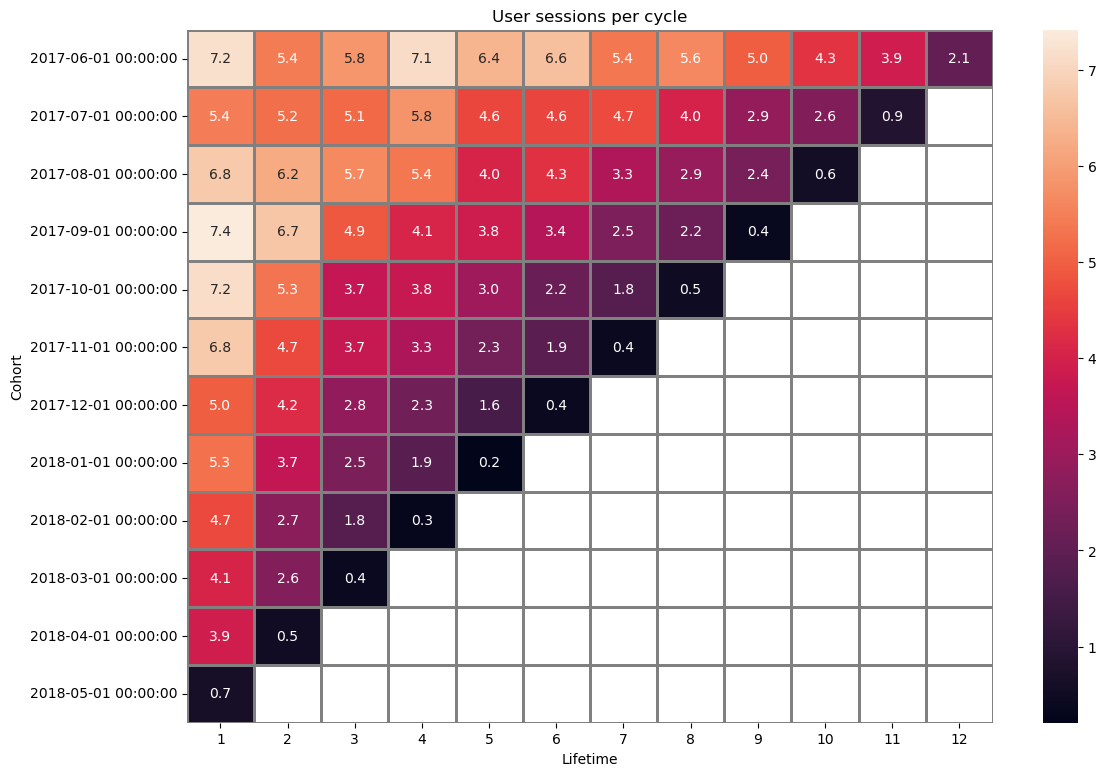

In [52]:
# Heatmap size
plt.figure(figsize=(13, 9))

# Title
plt.title('User sessions per cycle')

# Heatmap
sns.heatmap(
    retention,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
)

# Create names on the x,y-axis
plt.xlabel('Lifetime')
plt.ylabel('Cohort')

# Displays the result
plt.show()

In [53]:
# Retention rate in the 6nd month cycle
retention[6].mean()

3.344964355775797

No more than 7.5% of customers return to using the product. Every month the number of returning customers decreased, only in the 4th month cycle did it increase in some cohorts. And if you look in more detail at the 6th month cycle around 3.35% of users return to using the product.

[Back to stages](#back)

### When did the user start making purchases<a id="5"></a>

In [54]:
# orders_log dataset
orders_log.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [55]:
# Get the first date the order was placed
first_order = orders_log.groupby('uid').agg({
    'buy_ts' : 'min'
}).reset_index()

# Name the column
first_order.columns = ['uid', 'first_order_date']

# Displays the result
first_order.head()

,uid,first_order_date
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00


In [56]:
# Fetches the date
first_order['first_order_date'] = first_order['first_order_date'].dt.date

# Fetches the month
first_order['first_order_month'] = first_order['first_order_date'].astype('datetime64[M]')

In [57]:
# Sample data
first_visit.head()

,uid,first_start_ts,first_visit_date,first_visit_month
0,11863502262781,2018-03-01 17:27:00,2018-03-01,2018-03-01
1,49537067089222,2018-02-06 15:55:00,2018-02-06,2018-02-01
2,297729379853735,2017-06-07 18:47:00,2017-06-07,2017-06-01
3,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01
4,325320750514679,2017-09-30 14:29:00,2017-09-30,2017-09-01


In [58]:
# Combine datasets
user_first_buy = pd.merge(first_visit, first_order, on='uid')

In [59]:
# Sample data
user_first_buy.head()

,uid,first_start_ts,first_visit_date,first_visit_month,first_order_date,first_order_month
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,2018-01-03,2018-01-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-03,2017-06-01
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-01,2017-10-11,2017-10-01
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-01,2018-01-28,2018-01-01
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-11-24,2017-11-01


In [60]:
# View general information
user_first_buy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36523 entries, 0 to 36522
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   uid                36523 non-null  uint64        
 1   first_start_ts     36523 non-null  datetime64[ns]
 2   first_visit_date   36523 non-null  object        
 3   first_visit_month  36523 non-null  datetime64[ns]
 4   first_order_date   36523 non-null  object        
 5   first_order_month  36523 non-null  datetime64[ns]
dtypes: datetime64[ns](3), object(2), uint64(1)
memory usage: 2.0+ MB


In [61]:
# Change the data type
user_first_buy['first_visit_date'] = user_first_buy['first_visit_date'].astype('datetime64')
user_first_buy['first_order_date'] = user_first_buy['first_order_date'].astype('datetime64')

# Getting the first day of purchase
user_first_buy['first_purchase_days'] = (user_first_buy['first_order_date'] - user_first_buy['first_visit_date']).dt.days

In [62]:
# Sample data
user_first_buy.head()

,uid,first_start_ts,first_visit_date,first_visit_month,first_order_date,first_order_month,first_purchase_days
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,2018-01-03,2018-01-01,107
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-03,2017-06-01,0
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-01,2017-10-11,2017-10-01,0
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-01,2018-01-28,2018-01-01,1
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-11-24,2017-11-01,0


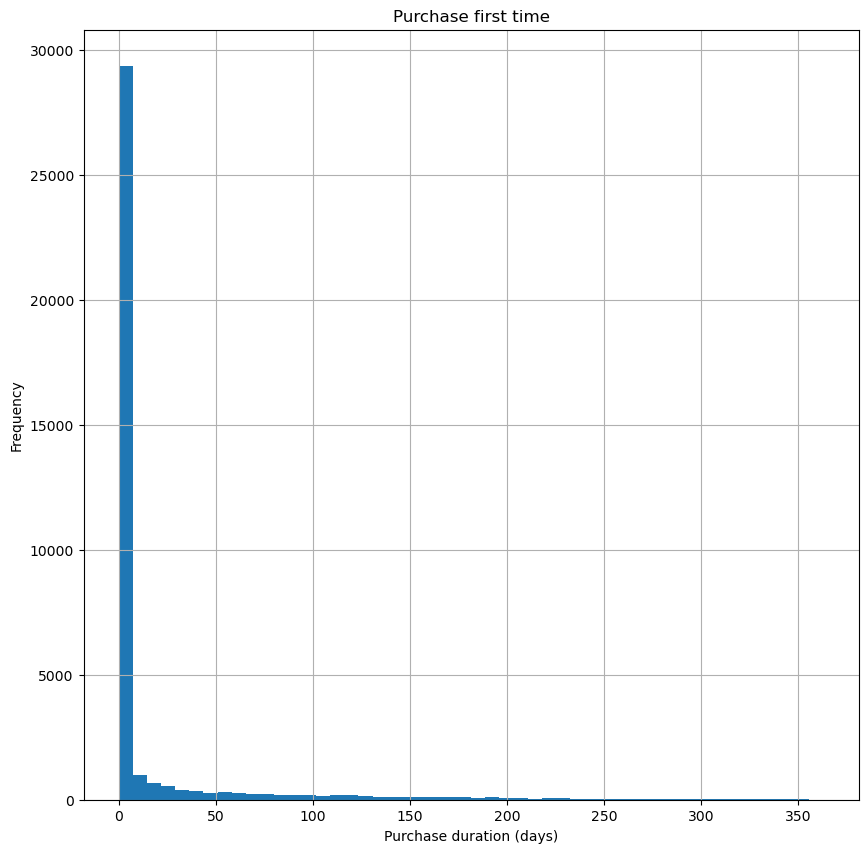

In [63]:
# Check the distribution
user_first_buy['first_purchase_days'].hist(bins=50, figsize = (10,10))

# Histogram title
plt.title("Purchase first time")

# Naming x,y-axis
plt.xlabel('Purchase duration (days)')
plt.ylabel('Frequency')

# Displays the result
plt.show()

For the same reason, because the distribution is not normal, it will use the mode.

In [64]:
# Calculates the mode
user_first_buy['first_purchase_days'].mode()

0    0
Name: first_purchase_days, dtype: int64

As seen most when users use the product they also make purchases of goods.

[Back to stages](#back)

### Number of orders made during a certain period of time <a id="6"></a>

In [65]:
# Sample data
orders_log.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [66]:
# Fetch month from `buy_ts` column
orders_log['order_month'] = orders_log['buy_ts'].astype('datetime64[M]')

In [67]:
# Order cohort by day
revenue_orders = orders_log.groupby(['order_month']).agg({
    'revenue' : 'sum',
    'buy_ts' : 'count'
})

revenue_orders.columns = ['revenue', 'transactions']

# Displays the result
revenue_orders

,revenue,transactions
order_month,,
2017-06-01,9557.49,2354
2017-07-01,12539.47,2363
2017-08-01,8758.78,1807
2017-09-01,18345.51,3387
2017-10-01,27987.70,5679
2017-11-01,27069.93,5659
2017-12-01,36388.60,6218
2018-01-01,19417.13,4721
2018-02-01,25560.54,5281


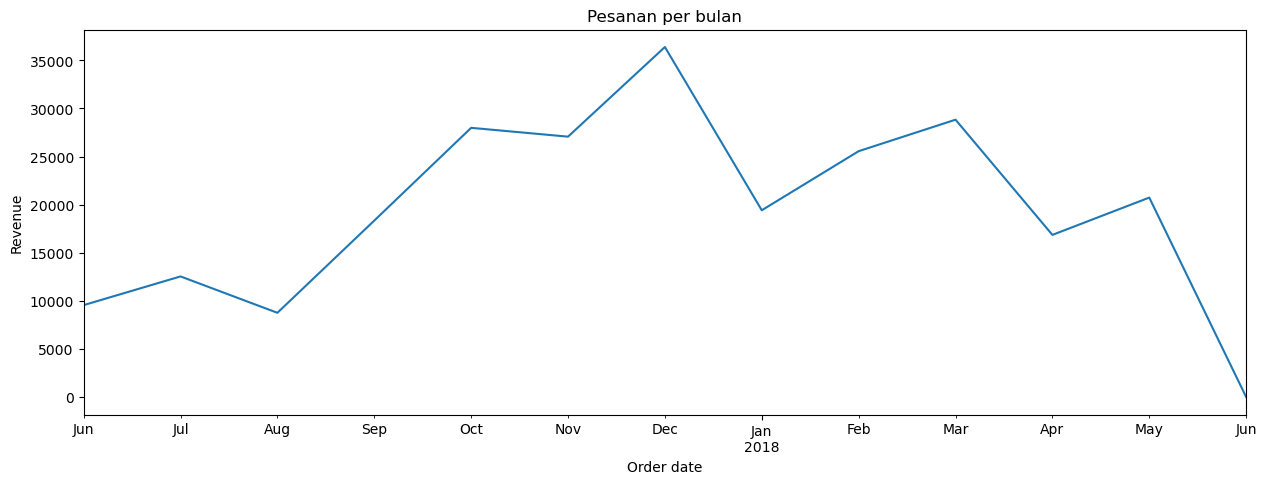

In [68]:
# Check the distribution
revenue_orders['revenue'].plot.line(figsize=(15, 5))

# Title
plt.title("Pesanan per bulan")

# Naming y-axis
plt.xlabel('Order date')
plt.ylabel('Revenue')

# Displays the result
plt.show()

The highest number of orders was in December-2017 which brought in around 36,389 with a total of 6,218 transactions.

[Back to stages](#back)

### Average purchase size <a id="7"></a>

In [69]:
# Overall average
print('Average purchase:', round(orders_log['revenue'].mean(),4))

Average purchase: 4.9996


In [70]:
# Sample data
first_order.head(2)

,uid,first_order_date,first_order_month
0,313578113262317,2018-01-03,2018-01-01
1,1575281904278712,2017-06-03,2017-06-01


In [71]:
# Sample data
orders_log.head(2)

,buy_ts,revenue,uid,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01


In [72]:
# Combine datasets
orders_log_merge = pd.merge(orders_log, first_order, on='uid')

In [73]:
# Agg based on the first month the order was placed
revenue_stats = orders_log_merge.groupby(['first_order_month', 'order_month']).agg({
    'buy_ts' : 'count',
    'revenue' : 'sum'
})

# Renaming columns
revenue_stats.rename(columns={'buy_ts':'transactions'}, inplace=True)

# Displays the result
revenue_stats

transactions   revenue
first_order_month order_month                        
2017-06-01        2017-06-01           2354   9557.49
                  2017-07-01            177    981.82
                  2017-08-01            174    885.34
                  2017-09-01            226   1931.30
                  2017-10-01            292   2068.58
...                                     ...       ...
2018-03-01        2018-05-01            176   1114.87
2018-04-01        2018-04-01           2495  10600.69
                  2018-05-01            195   1209.92
2018-05-01        2018-05-01           3249  13925.76
2018-06-01        2018-06-01              1      3.42

[79 rows x 2 columns]

In [74]:
# Calculates the average income per user
revenue_stats['revenue_per_user'] = revenue_stats['revenue'] / revenue_stats['transactions']

# Reset index
revenue_stats = revenue_stats.reset_index()

# Sample data
revenue_stats.head()

,first_order_month,order_month,transactions,revenue,revenue_per_user
0,2017-06-01,2017-06-01,2354,9557.49,4.060106
1,2017-06-01,2017-07-01,177,981.82,5.547006
2,2017-06-01,2017-08-01,174,885.34,5.088161
3,2017-06-01,2017-09-01,226,1931.30,8.545575
4,2017-06-01,2017-10-01,292,2068.58,7.084178


In [75]:
# Lifetime cohort
revenue_stats['cohort_lifetime'] = revenue_stats['order_month'] - revenue_stats['first_order_month']

# Sample data
revenue_stats.head()

,first_order_month,order_month,transactions,revenue,revenue_per_user,cohort_lifetime
0,2017-06-01,2017-06-01,2354,9557.49,4.060106,0 days
1,2017-06-01,2017-07-01,177,981.82,5.547006,30 days
2,2017-06-01,2017-08-01,174,885.34,5.088161,61 days
3,2017-06-01,2017-09-01,226,1931.30,8.545575,92 days
4,2017-06-01,2017-10-01,292,2068.58,7.084178,122 days


In [76]:
# Convert cohort_lifetime column values to months
revenue_stats['cohort_lifetime'] = (
    
    # number of cohort days equivalent to one month
    revenue_stats['cohort_lifetime'] / np.timedelta64(1, 'M')
)

# Sample data
revenue_stats.head()

,first_order_month,order_month,transactions,revenue,revenue_per_user,cohort_lifetime
0,2017-06-01,2017-06-01,2354,9557.49,4.060106,0.000000
1,2017-06-01,2017-07-01,177,981.82,5.547006,0.985647
2,2017-06-01,2017-08-01,174,885.34,5.088161,2.004148
3,2017-06-01,2017-09-01,226,1931.30,8.545575,3.022649
4,2017-06-01,2017-10-01,292,2068.58,7.084178,4.008296


In [77]:
# Round the value
revenue_stats['cohort_lifetime'] = (
    revenue_stats['cohort_lifetime'].round().astype('int')
)

# Sample data
revenue_stats.head()

,first_order_month,order_month,transactions,revenue,revenue_per_user,cohort_lifetime
0,2017-06-01,2017-06-01,2354,9557.49,4.060106,0
1,2017-06-01,2017-07-01,177,981.82,5.547006,1
2,2017-06-01,2017-08-01,174,885.34,5.088161,2
3,2017-06-01,2017-09-01,226,1931.30,8.545575,3
4,2017-06-01,2017-10-01,292,2068.58,7.084178,4


In [78]:
# Separate the day in the first_order_month column
revenue_stats['first_order_month'] = (
    revenue_stats['first_order_month'].dt.to_period('M')
)

# Sample data
revenue_stats.head()

,first_order_month,order_month,transactions,revenue,revenue_per_user,cohort_lifetime
0,2017-06,2017-06-01,2354,9557.49,4.060106,0
1,2017-06,2017-07-01,177,981.82,5.547006,1
2,2017-06,2017-08-01,174,885.34,5.088161,2
3,2017-06,2017-09-01,226,1931.30,8.545575,3
4,2017-06,2017-10-01,292,2068.58,7.084178,4


In [79]:
# Pivot table average per user
revenue_per_user_pivot = revenue_stats.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='revenue_per_user',
    aggfunc='mean'
)

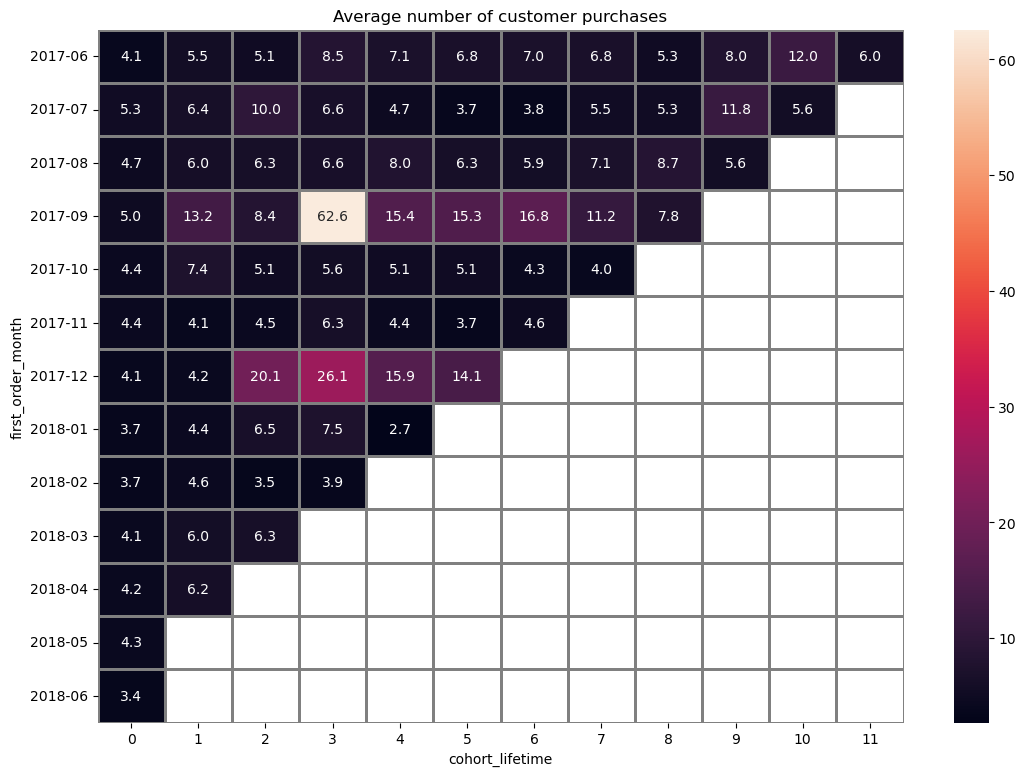

In [80]:
# Heatmap size
plt.figure(figsize=(13, 9))

# Title
plt.title('Average number of customer purchases')

# Heatmap
sns.heatmap(
    revenue_per_user_pivot,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
)

# Displays the result
plt.show()

In [81]:
# 6th month cycle
revenue_per_user_pivot[6].mean()

7.048592492328408

If you look at it in more detail, for example in the 6th month customer cycle, the average purchase is around 7.05

In [82]:
# Highest revenue
revenue_stats.loc[(revenue_stats['first_order_month']=='2017-09') & (revenue_stats['cohort_lifetime']==3)]

,first_order_month,order_month,transactions,revenue,revenue_per_user,cohort_lifetime
36,2017-09,2017-12-01,164,10261.52,62.570244,3


Users with the highest revenue may indeed spend a certain amount to buy something.

[Back to stages](#back)

### Amount of money contributed (LTV) <a id="8"></a>

In [83]:
# Sample data
orders_log.head()

,buy_ts,revenue,uid,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01


In [84]:
# Get the first date the order was placed
first_orders = orders_log.groupby('uid').agg({
    'order_month':'min'
}).reset_index()

# Name the column
first_orders.columns = ['uid', 'first_order_month']

# Displays the result
first_orders.head()

,uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


In [85]:
# Cohort
cohort_sizes = first_orders.groupby('first_order_month').agg({
    'uid': 'nunique'
}).reset_index()

# Name the column
cohort_sizes.columns = ['first_order_month', 'n_buyers']

# Displays the result
cohort_sizes.head()

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [86]:
# Combine datasets
orders_ = pd.merge(orders_log,first_orders, on='uid')

# Displays the result
orders_.head()

,buy_ts,revenue,uid,order_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01


In [87]:
# Agg based on `first_order_month` and `order_month` column
cohorts = orders_.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()

# Displays the result
cohorts.head()

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [88]:
# Combine datasets
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')

# Displays the result
report.head()

,first_order_month,n_buyers,order_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


In [89]:
# Cohort Age
report['age'] = (
    report['order_month'] - report['first_order_month']
) / np.timedelta64(1, 'M')

# Round the value
report['age'] = report['age'].round().astype('int')

# Calculates LTV
report['ltv'] = report['revenue'] / report['n_buyers']

# Displays the result
report.head()

,first_order_month,n_buyers,order_month,revenue,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531


because the margin rate is unknown, assume that revenue includes the calculation of the margin rate.

In [90]:
# Create a pivot table
output = report.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean'
).round(2)

# Displays results and fills in blank values
output.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,0.49,0.44,0.95,1.02,0.74,0.95,0.58,0.55,0.61,0.57,0.26
2017-07-01,6.01,0.34,0.62,0.36,0.18,0.16,0.12,0.14,0.16,0.15,0.16,
2017-08-01,5.28,0.47,0.46,0.39,0.49,0.28,0.21,0.41,0.29,0.19,,
2017-09-01,5.64,1.12,0.52,3.98,0.4,0.65,0.7,0.24,0.18,,,
2017-10-01,5.00,0.54,0.19,0.16,0.15,0.12,0.08,0.12,,,,
2017-11-01,5.15,0.4,0.2,0.32,0.15,0.05,0.11,,,,,
2017-12-01,4.74,0.26,0.93,1.07,0.31,0.34,,,,,,
2018-01-01,4.14,0.29,0.3,0.14,0.06,,,,,,,
2018-02-01,4.16,0.28,0.08,0.07,,,,,,,,


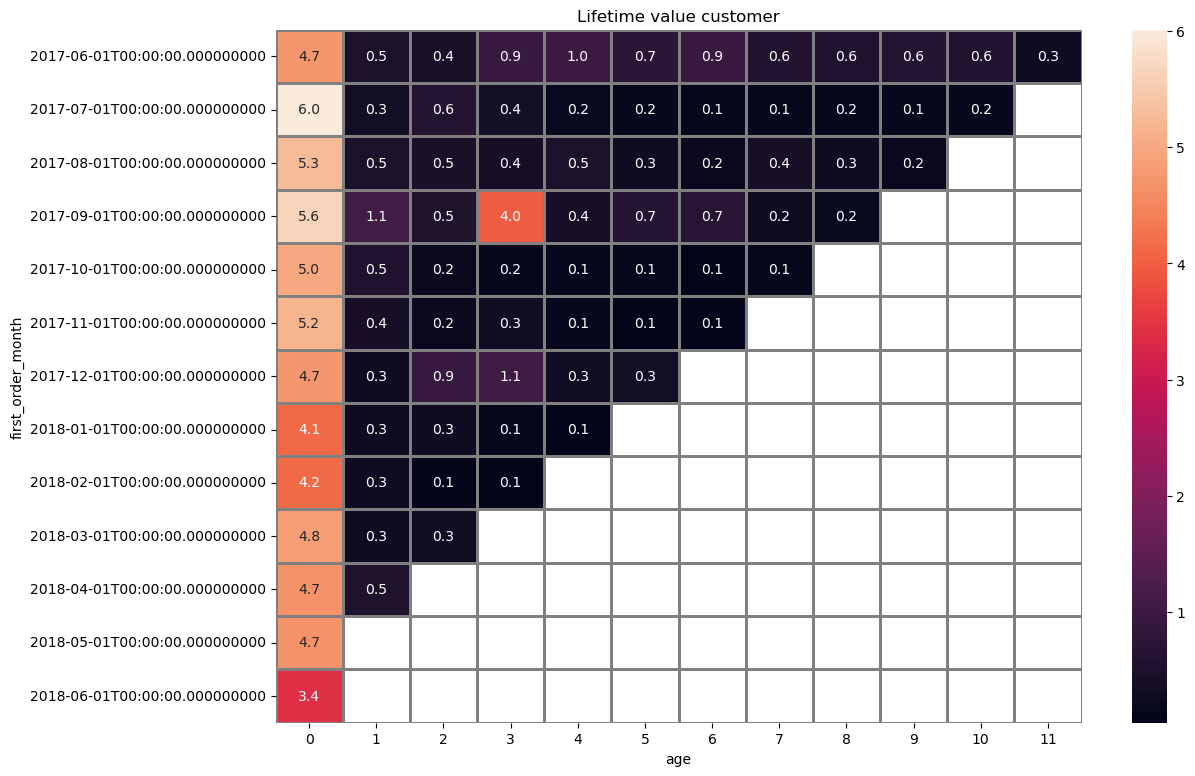

In [91]:
# Heatmap size
plt.figure(figsize=(13, 9))

# Title
plt.title('Lifetime value customer')

# Heatmap
sns.heatmap(
    output,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
)

# Displays the result
plt.show()

In [92]:
# 6th month cycle
output.cumsum(axis=1).mean(axis=0)[6]

8.385

Sekitar total 8.39 dihabiskan pelanggan selama 6 bulan sejak pesanan pertama dilakukan.

[Back to stages](#back)

###  Amount of money spent <a id="9"></a>

In [93]:
# Sample data
costs.head(3)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53


In [94]:
# Displays the result
print('Total amount spent:', costs['costs'].sum())

Total amount spent: 329131.62


If per source,

In [95]:
# Agg dataset
source_stats = costs.groupby(['source_id']).agg({
    'costs' : 'sum'
})

# Sort values
source_stats = source_stats.sort_values(by='costs', ascending=False)

# Displays the result
source_stats

,costs
source_id,
3,141321.63
4,61073.60
5,51757.10
2,42806.04
1,20833.27
10,5822.49
9,5517.49


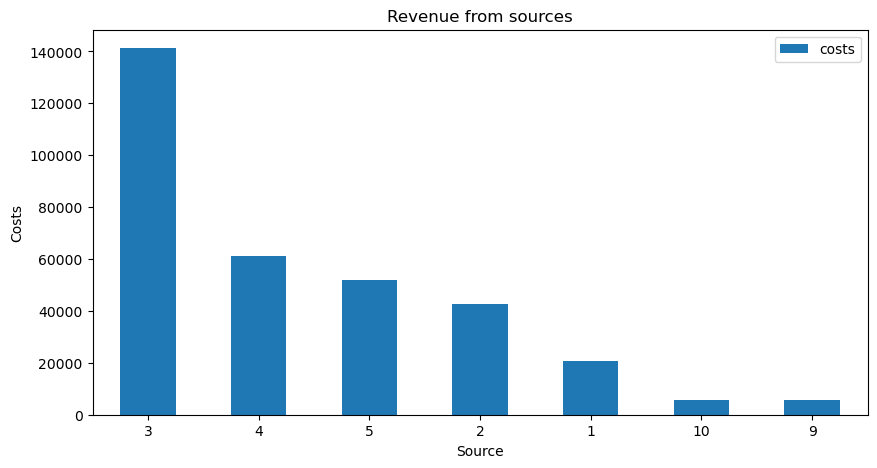

In [96]:
# Check the distribution
source_stats.plot(kind='bar', figsize=(10, 5))

# Title
plt.title("Revenue from sources")

# Naming x,y-axis
plt.xlabel('Source')
plt.ylabel('Costs')

# Rotate x labels
plt.xticks(rotation=0)

# Displays the result
plt.show()

Source 3 dominates the other sources, and source 9 is the least expensive.

If from time to time,

In [97]:
# Fetches month
costs['dt_month'] = costs['dt'].astype('datetime64[M]')

In [98]:
# Agg dataset
costs_per_month = costs.groupby('dt_month').agg({
    'costs' : 'sum'
})

# Displays the result
costs_per_month

,costs
dt_month,
2017-06-01,18015.00
2017-07-01,18240.59
2017-08-01,14790.54
2017-09-01,24368.91
2017-10-01,36322.88
2017-11-01,37907.88
2017-12-01,38315.35
2018-01-01,33518.52
2018-02-01,32723.03


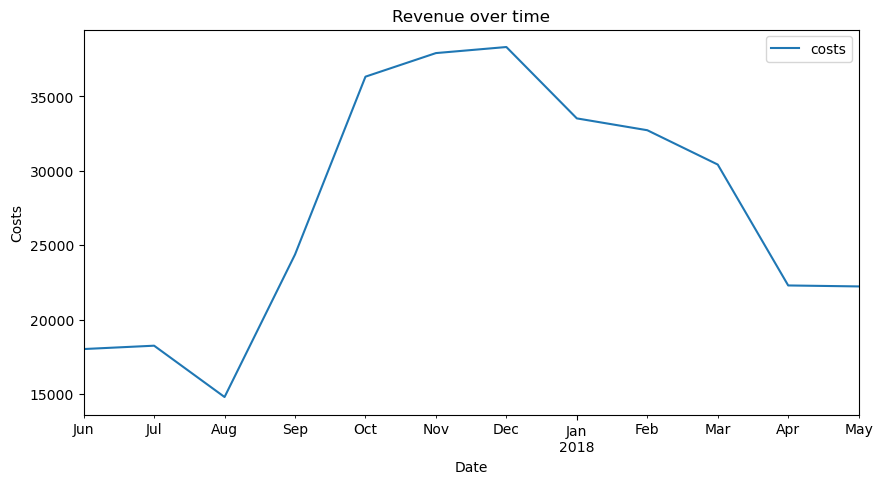

In [99]:
# Check the distribution
costs_per_month.plot(kind='line', figsize=(10, 5))

# Title
plt.title("Revenue over time")

# Naming x,y-axis
plt.xlabel('Date')
plt.ylabel('Costs')

# Displays the result
plt.show()

December-2017 is the month that costs the most, and the lowest is in August-2017.

[Back to stages](#back)

### Customer acquisition cost from each source (CAC) <a id="10"></a>

In [100]:
# Finding uid by source
source_with_buyers = visits_merge.groupby('source_id',as_index=False).agg({
    'uid' : 'nunique'
})

# Displays the result
source_with_buyers

,source_id,uid
0,1,18999
1,10,8067
2,2,26245
3,3,74756
4,4,83525
5,5,56974
6,6,6
7,7,34
8,9,9264


In [101]:
# Reset index
source_stats.reset_index(inplace=True)

In [102]:
# Checking the result
source_stats

,source_id,costs
0,3,141321.63
1,4,61073.60
2,5,51757.10
3,2,42806.04
4,1,20833.27
5,10,5822.49
6,9,5517.49


In [103]:
# Combine datasets
user_cost = source_stats.merge(source_with_buyers, on='source_id')

# Get cac from user
user_cost['cac'] = user_cost['costs']/user_cost['uid']

In [104]:
# Agg cac
user_cost_agg = user_cost.groupby('source_id').agg({
    'cac' : 'mean'
})

# Sort values
user_cost_agg = user_cost_agg.sort_values(by='cac', ascending=False)

# Displays the result
user_cost_agg

,cac
source_id,
3,1.890439
2,1.631017
1,1.096546
5,0.908434
4,0.731201
10,0.721766
9,0.595584


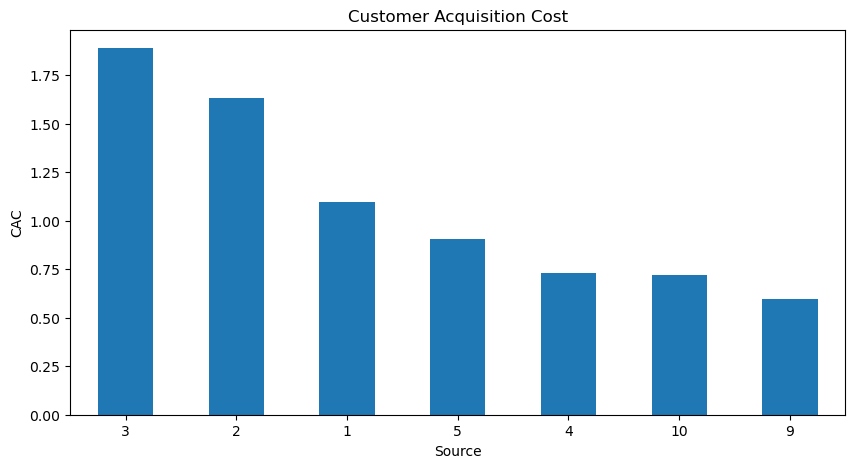

In [105]:
# Check the distribution
user_cost_agg['cac'].plot(kind='bar', figsize=(10, 5))

# Title
plt.title("Customer Acquisition Cost")

# Naming x,y-axis
plt.xlabel('Source')
plt.ylabel('CAC')

# Rotate x labels
plt.xticks(rotation=0)

# Displays the result
plt.show()

The costs required at the 3rd source are the most, followed by the 2nd source CAC.

[Back to stages](#back)

### How profitable the investment is (ROMI) <a id="11"></a>

In [106]:
# Sample data
report.head()

,first_order_month,n_buyers,order_month,revenue,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531


In [107]:
# Sample data
costs_per_month.head()

,costs
dt_month,
2017-06-01,18015.00
2017-07-01,18240.59
2017-08-01,14790.54
2017-09-01,24368.91
2017-10-01,36322.88


In [108]:
# Combine datasets
report_final = pd.merge(report, costs_per_month, left_on='first_order_month', right_on='dt_month')

# Displays the result
report_final.head()

,first_order_month,n_buyers,order_month,revenue,age,ltv,costs
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414,18015.0
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329,18015.0
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637,18015.0
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671,18015.0
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531,18015.0


In [109]:
# Calculates CAC
report_final['cac'] = report_final['costs'] / report_final['n_buyers']

# Displays the result
report_final.head()

,first_order_month,n_buyers,order_month,revenue,age,ltv,costs,cac
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414,18015.0,8.905091
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329,18015.0,8.905091
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637,18015.0,8.905091
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671,18015.0,8.905091
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531,18015.0,8.905091


In [110]:
# Calculate ROMI
report_final['romi'] = report_final['ltv'] / report_final['cac']

# Create a pivot table
output_final = report_final.pivot_table(
    index='first_order_month', columns='age', values='romi', aggfunc='mean'
)

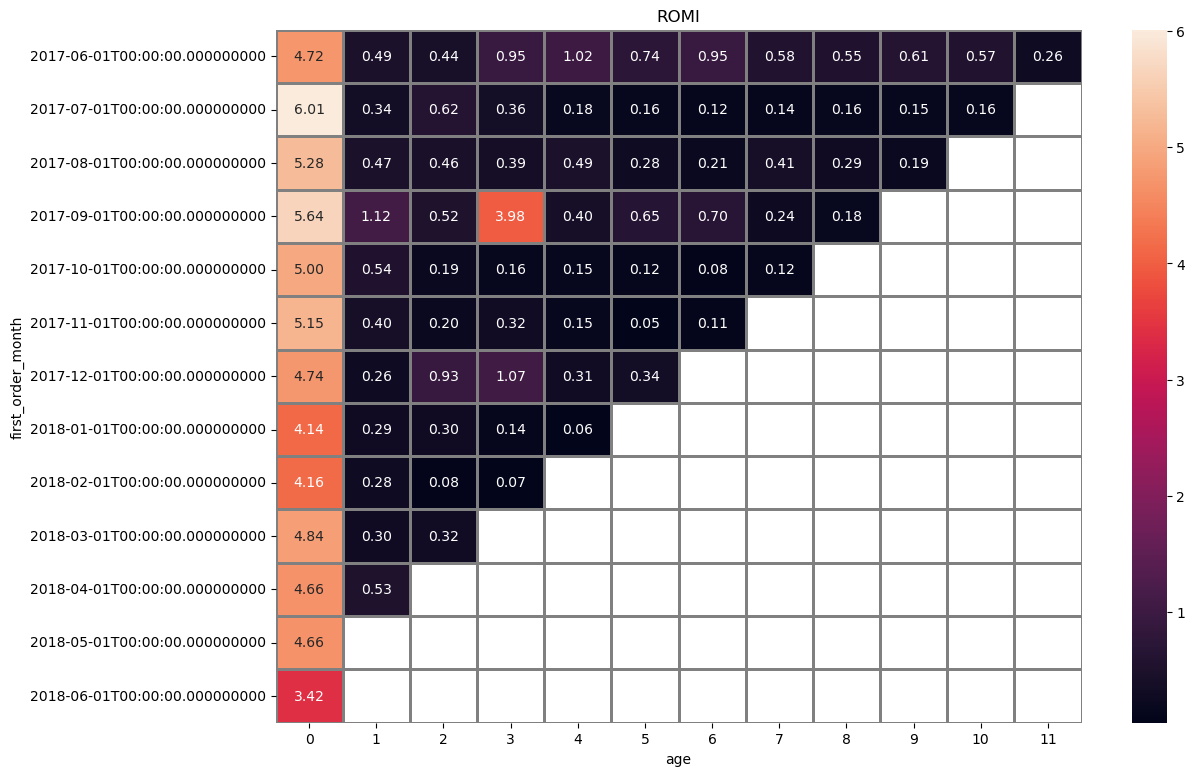

In [111]:
# Heatmap size
plt.figure(figsize=(13, 9))

# Title
plt.title('ROMI')

# Heatmap
sns.heatmap(
    output,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='gray',
)

# Displays the result
plt.show()

In [112]:
# Calculates the average value in each column
output.mean(axis=0)

age
0     4.801538
1     0.456364
2     0.406000
3     0.826667
4     0.345000
5     0.334286
6     0.361667
7     0.298000
8     0.295000
9     0.316667
10    0.365000
11    0.260000
dtype: float64

On average, none of the cohorts managed to cover marketing costs. Apparently, the marketing team needs to make some changes.

[Back to stages](#back)

## General Conclusion <a id="Conclusion"></a>

After going through the process of repairing the data and conducting analysis, the following are the findings:
1. Users use the platform at least once per day, with an average of 60 seconds per user
2. Generally when users use the platform they also make purchases, December is the month that receives the most income
3. The average user spends at least 5 dollars
4. None of the cohorts managed to cover marketing costs.
5. Source no. 3 platform is the recommended source because this source is the source that brings the most profit from all platforms but you also need to pay attention because the cac of the platform is also the highest.

[Back to stages](#back)